# Importing libraries and reading in KDDCup Dataset into pandas DataFrame
- No null values in dataset
- Apply discretization to continuous features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

# read_csv reads a csv file(kddcup.data) into a DataFrame
columns = ['duration', 'protocol_type', 'service', 'flag',
           'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent',
           'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
           'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
           'num_shells', 'num_access_files', 'num_outbound_cmds',
           'is_hot_login', 'is_guest_login', 'count', 'srv_count',
           'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
           'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
           'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
           'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
           'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
           'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
           'dst_host_srv_rerror_rate', 'attack_type']
kddDF = pd.read_csv("kddcup.data_10_percent_corrected", names = columns)

## Explore the data

In [2]:
# Print information about dataframe
kddDF.info()

# Display and describe the dataframe
display(kddDF)
display(kddDF.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Applying discretization to transform continuous features to categorical
- Drop the columns that are totally skewed towards a single category
- Number of columns dropped from 42 to 10

In [3]:
for column in kddDF:
    if kddDF[column].dtypes in ['float64', 'int64']:
        kddDF[column] = pd.qcut(kddDF[column], q=4, duplicates='drop')
    if len(kddDF[column].unique()) == 1:
        kddDF.drop(column, inplace = True, axis=1)


In [4]:
# Print information about dataframe
kddDF.info()

# Display and describe the dataframe
display(kddDF)
display(kddDF.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   protocol_type           494021 non-null  object  
 1   service                 494021 non-null  object  
 2   flag                    494021 non-null  object  
 3   src_bytes               494021 non-null  category
 4   count                   494021 non-null  category
 5   srv_count               494021 non-null  category
 6   dst_host_srv_count      494021 non-null  category
 7   dst_host_same_srv_rate  494021 non-null  category
 8   dst_host_diff_srv_rate  494021 non-null  category
 9   attack_type             494021 non-null  object  
dtypes: category(6), object(4)
memory usage: 17.9+ MB


,protocol_type,service,flag,src_bytes,count,srv_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,attack_type
0,tcp,http,SF,"(45.0, 520.0]","(-0.001, 117.0]","(-0.001, 10.0]","(-0.001, 46.0]","(0.41, 1.0]","(-0.001, 0.04]",normal.
1,tcp,http,SF,"(45.0, 520.0]","(-0.001, 117.0]","(-0.001, 10.0]","(-0.001, 46.0]","(0.41, 1.0]","(-0.001, 0.04]",normal.
2,tcp,http,SF,"(45.0, 520.0]","(-0.001, 117.0]","(-0.001, 10.0]","(-0.001, 46.0]","(0.41, 1.0]","(-0.001, 0.04]",normal.
3,tcp,http,SF,"(45.0, 520.0]","(-0.001, 117.0]","(-0.001, 10.0]","(-0.001, 46.0]","(0.41, 1.0]","(-0.001, 0.04]",normal.
4,tcp,http,SF,"(45.0, 520.0]","(-0.001, 117.0]","(-0.001, 10.0]","(46.0, 255.0]","(0.41, 1.0]","(-0.001, 0.04]",normal.
...,...,...,...,...,...,...,...,...,...,...
494016,tcp,http,SF,"(45.0, 520.0]","(-0.001, 117.0]","(-0.001, 10.0]","(46.0, 255.0]","(0.41, 1.0]","(-0.001, 0.04]",normal.
494017,tcp,http,SF,"(45.0, 520.0]","(-0.001, 117.0]","(-0.001, 10.0]","(46.0, 255.0]","(0.41, 1.0]","(-0.001, 0.04]",normal.
494018,tcp,http,SF,"(45.0, 520.0]","(-0.001, 117.0]","(10.0, 510.0]","(46.0, 255.0]","(0.41, 1.0]","(-0.001, 0.04]",normal.
494019,tcp,http,SF,"(45.0, 520.0]","(-0.001, 117.0]","(10.0, 510.0]","(46.0, 255.0]","(0.41, 1.0]","(-0.001, 0.04]",normal.


,protocol_type,service,flag,src_bytes,count,srv_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,attack_type
count,494021,494021,494021,494021,494021,494021,494021,494021,494021,494021
unique,3,66,11,4,3,3,2,2,2,23
top,icmp,ecr_i,SF,"(520.0, 1032.0]","(510.0, 511.0]","(510.0, 511.0]","(46.0, 255.0]","(0.41, 1.0]","(-0.001, 0.04]",smurf.
freq,283602,281400,378440,232485,227895,226559,370372,370420,371245,280790


# Use of stratified sampling to split the dataset based on the attack_type attribute (target variable)
- Training (70%)
- Testing (30%)

In [5]:
# Define function to split data into training and testing set
def train_test_split(data, test_size):
    # Using stratified sampling to ensure that the training data contains the best representation of the original dataset
    # N = round(0.7 * len(kddDF))
    train_df = data.groupby('attack_type', group_keys=False).apply(lambda x: x.sample(frac=test_size))

    # Drop the rows in the training set from the original dataset to get the testing dataset
    test_df = kddDF.drop(train_df.index.values)

    return train_df, test_df



In [6]:
# Split the data set
train_df, test_df = train_test_split(kddDF, 0.7)

Original dataset distribution:


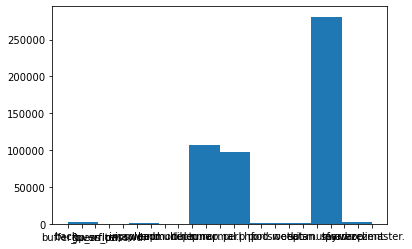

Training dataset distribution:


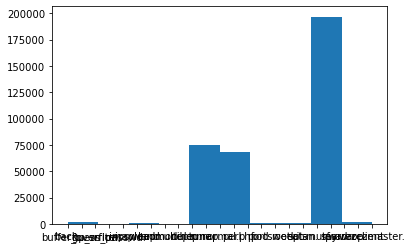

Testing dataset distribution:


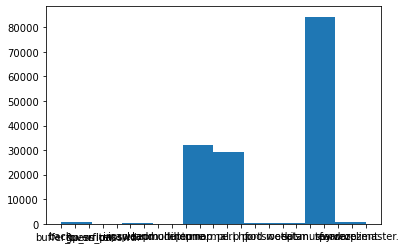

No. of records in train set: 345815
No. of records in test set: 148206


In [7]:
# Comparing distribution of data in original dataset, training set, and testing set wrt. attack_type
print("Original dataset distribution:")
plt.hist(kddDF['attack_type'].sort_values())
plt.show()

print("Training dataset distribution:")
plt.hist(train_df['attack_type'].sort_values())
plt.show()

print("Testing dataset distribution:")
plt.hist(test_df['attack_type'].sort_values())
plt.show()

# Checking (approx.) training = 2/3 + testing = 1/3
print("No. of records in train set:", len(train_df))
print("No. of records in test set:", len(test_df))

# Define helper functions for the Naive Bayesian Classifier

In [8]:
# Function to create a lookup table consisting of each feature's class probabilities
def create_table(df, label_column):
    # instantiate a dictionary to store the probabilities for each feature wrt. target variable
    table = {}

    # determine values for the label
    value_counts = df[label_column].value_counts().sort_index()
    table["class_names"] = value_counts.index.to_numpy()
    table["class_counts"] = value_counts.values

    # determine probabilities for the features
    for feature in df.drop(label_column, axis=1).columns:
        table[feature] = {}

        # determine counts
        counts = df.groupby(label_column)[feature].value_counts()
        df_counts = counts.unstack(label_column)

        # add one count to avoid zero counts
        if df_counts.isna().any(axis=None):
            df_counts.fillna(value=0, inplace=True)
            df_counts += 1

        # calculate probabilities
        df_probabilities = df_counts / df_counts.sum()
        for value in df_probabilities.index:
            probabilities = df_probabilities.loc[value].to_numpy()
            table[feature][value] = probabilities
            
    return table

# Function to predict from each row of a dataset using the probability lookup table
def predict(row, lookup_table):
    
    class_estimates = lookup_table["class_counts"]
    for feature in row.index:

        try:
            value = row[feature]
            probabilities = lookup_table[feature][value]
            class_estimates = class_estimates * probabilities

        # skip in case "value" only occurs in test set but not in train set
        # (meaning that "value" does not exist in "lookup_table")
        except KeyError:
            continue

    index_max_class = class_estimates.argmax()
    prediction = lookup_table["class_names"][index_max_class]
    
    return prediction

# Naive Bayes Algorithm to train from training data, and then predict from testing set
def Naive_Bayes_Classifier(train_df, train_label, test_df):
    # Instantiate dictionary of probablities
    lookup_table = create_table(train_df, label_column = train_label)

    # Apply predict function for every row of testing dataset
    predictions = test_df.apply(predict, axis=1, args=(lookup_table,))

    return predictions


# Instantiate Naive Bayes Classifier and evaluate the results

In [9]:
# Testing the model on training set
predictions = Naive_Bayes_Classifier(train_df, "attack_type", train_df)
predictions_correct = predictions == train_df['attack_type']
accuracy = predictions_correct.mean()

print("Accuracy of prediction for training set:", accuracy)


Accuracy of prediction for training set: 0.99185691771612


In [10]:
# Testing the model on testing set
predictions = Naive_Bayes_Classifier(train_df, "attack_type", test_df)
predictions_correct = predictions == test_df['attack_type']
accuracy = predictions_correct.mean()

print("Accuracy of prediction for testing set:", accuracy)

Accuracy of prediction for testing set: 0.9919571407365424
